In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF TRUNCATE

In [2]:
env='InvertedPendulum-v4'
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER-DDPG"
print(df_comper.shape)

(249338, 17)


In [3]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(248738, 17)


In [4]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,InvertedPendulum-v4,02-08-2023 20:54:44,16,0,16,0.000795,1,17,True,16,16.0,16.0,16.0,16.0,COMPER-DDPG
1,1,2,InvertedPendulum-v4,02-08-2023 20:54:44,17,0,17,0.000845,1,18,True,17,16.5,16.5,16.5,16.5,COMPER-DDPG
2,1,3,InvertedPendulum-v4,02-08-2023 20:54:45,18,0,18,0.000895,1,19,True,18,17.0,17.0,17.0,17.0,COMPER-DDPG
3,1,4,InvertedPendulum-v4,02-08-2023 20:54:46,19,0,19,0.000944,1,20,True,19,17.5,17.5,17.5,17.5,COMPER-DDPG
4,1,5,InvertedPendulum-v4,02-08-2023 20:54:47,20,0,20,0.000994,1,21,True,20,18.0,18.0,18.0,18.0,COMPER-DDPG


In [5]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,InvertedPendulum-v4,21-07-2023 11:57:31,22,23,0,0.001093,1,23,True,22,22.0,22.0,22.0,22.0,DDPG
1,1,2,InvertedPendulum-v4,21-07-2023 11:57:31,23,24,0,0.001143,1,24,True,23,22.5,22.5,22.5,22.5,DDPG
2,1,3,InvertedPendulum-v4,21-07-2023 11:57:31,24,25,0,0.001193,1,25,True,24,23.0,23.0,23.0,23.0,DDPG
3,1,4,InvertedPendulum-v4,21-07-2023 11:57:32,25,26,0,0.001243,1,26,True,25,23.5,23.5,23.5,23.5,DDPG
4,1,5,InvertedPendulum-v4,21-07-2023 11:57:32,26,27,0,0.001292,1,27,True,26,24.0,24.0,24.0,24.0,DDPG


In [6]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,InvertedPendulum-v4,02-08-2023 20:54:44,16,0,16,0.000795,1,17,True,16,16.0,16.0,16.0,16.0,COMPER-DDPG
1,1,2,InvertedPendulum-v4,02-08-2023 20:54:44,17,0,17,0.000845,1,18,True,17,16.5,16.5,16.5,16.5,COMPER-DDPG
2,1,3,InvertedPendulum-v4,02-08-2023 20:54:45,18,0,18,0.000895,1,19,True,18,17.0,17.0,17.0,17.0,COMPER-DDPG
3,1,4,InvertedPendulum-v4,02-08-2023 20:54:46,19,0,19,0.000944,1,20,True,19,17.5,17.5,17.5,17.5,COMPER-DDPG
4,1,5,InvertedPendulum-v4,02-08-2023 20:54:47,20,0,20,0.000994,1,21,True,20,18.0,18.0,18.0,18.0,COMPER-DDPG


In [7]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
49462,5,49463,InvertedPendulum-v4,21-07-2023 18:33:28,49996,7835,0,0.999,50,997,True,996,505.676081,946.5,971.5,991.5,DDPG
49463,5,49464,InvertedPendulum-v4,21-07-2023 18:33:28,49997,7835,0,0.999,50,998,True,997,505.686014,947.5,972.5,992.5,DDPG
49464,5,49465,InvertedPendulum-v4,21-07-2023 18:33:28,49998,7835,0,0.999,50,999,True,998,505.695967,948.5,973.5,993.5,DDPG
49465,5,49466,InvertedPendulum-v4,21-07-2023 18:33:28,49999,7835,0,0.999,50,1000,True,999,505.705939,949.5,974.5,994.5,DDPG
49466,5,49467,InvertedPendulum-v4,21-07-2023 18:33:28,50000,7835,0,0.999,50,1001,True,1000,505.715932,950.5,975.5,995.5,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

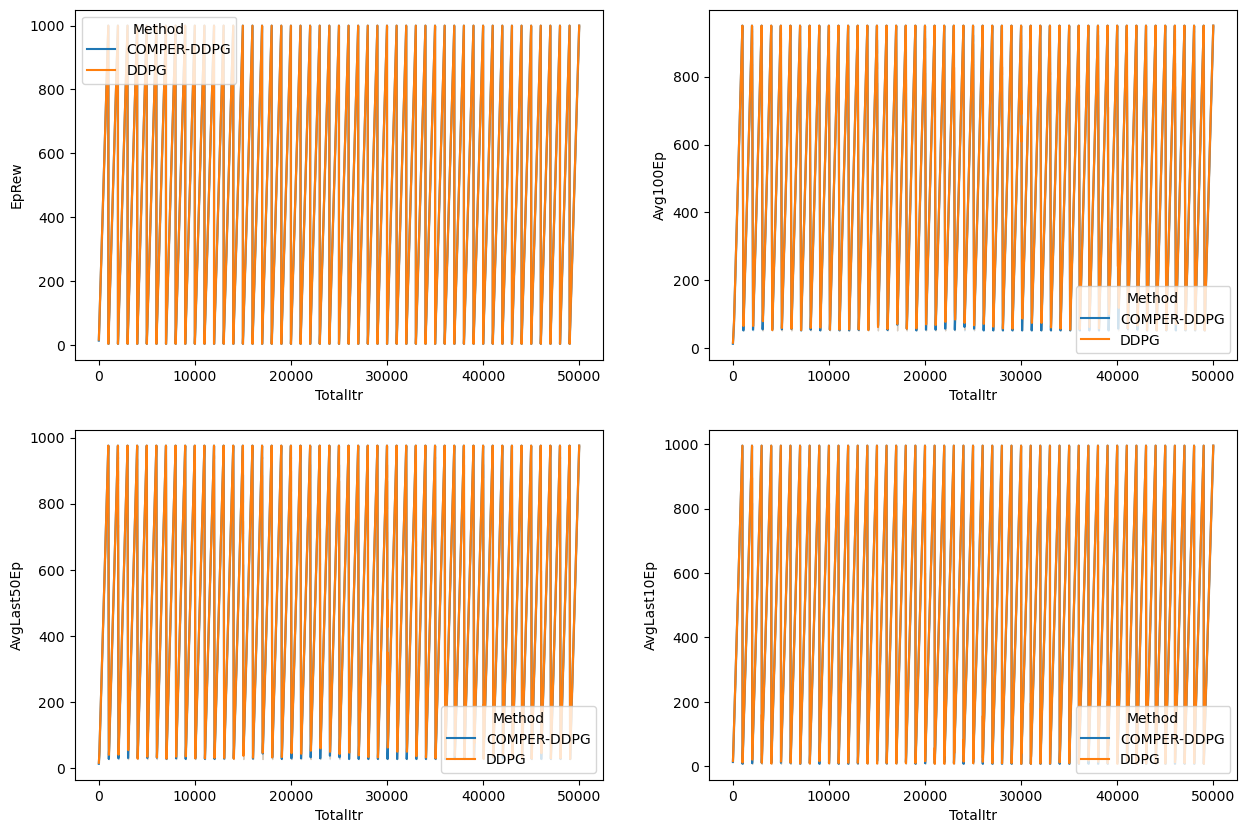

In [8]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])


In [9]:
path ='COMPER_DDPG/data_using_truncate/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER-DDPG"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,2,31-07-2023 19:43:25,InvertedPendulum-v4,5000,2.0,COMPER-DDPG
1,2,31-07-2023 22:01:02,InvertedPendulum-v4,10000,2.0,COMPER-DDPG
2,2,01-08-2023 00:21:06,InvertedPendulum-v4,15000,2.0,COMPER-DDPG
3,2,01-08-2023 02:40:53,InvertedPendulum-v4,20000,2.0,COMPER-DDPG
4,2,01-08-2023 05:00:46,InvertedPendulum-v4,25000,2.0,COMPER-DDPG


In [10]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,2.160000
std,1.428571,14507.211437,0.478518
min,1.000000,5000.000000,2.000000
25%,2.000000,15000.000000,2.000000
50%,3.000000,27500.000000,2.000000
75%,4.000000,40000.000000,2.000000
max,5.000000,50000.000000,4.500000


In [11]:
path ='DPPG/data_using_truncate/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,21-07-2023 12:05:06,InvertedPendulum-v4,5000,2.0,DDPG
1,1,21-07-2023 12:12:41,InvertedPendulum-v4,10000,2.0,DDPG
2,1,21-07-2023 12:20:23,InvertedPendulum-v4,15000,3.0,DDPG
3,1,21-07-2023 12:28:14,InvertedPendulum-v4,20000,2.0,DDPG
4,1,21-07-2023 12:36:18,InvertedPendulum-v4,25000,3.0,DDPG


In [12]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,2.450000
std,1.428571,14507.211437,0.980681
min,1.000000,5000.000000,2.000000
25%,2.000000,15000.000000,2.000000
50%,3.000000,27500.000000,2.000000
75%,4.000000,40000.000000,2.375000
max,5.000000,50000.000000,5.500000


In [13]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

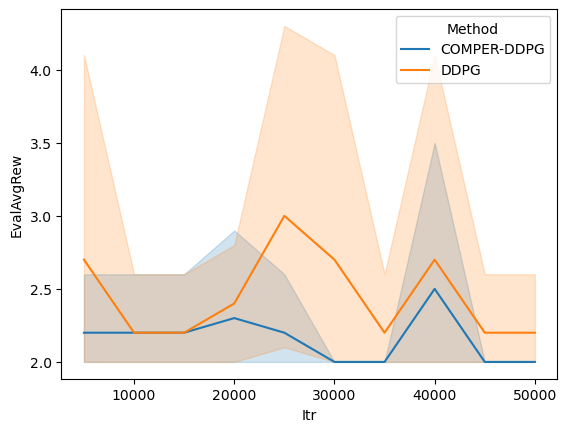

In [14]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [15]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,115,115,COMPER-DDPG,65.5
100,116,116,COMPER-DDPG,66.5
101,117,117,COMPER-DDPG,67.5
102,118,118,COMPER-DDPG,68.5
103,119,119,COMPER-DDPG,69.5


In [16]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,121,121,DDPG,71.5
100,122,122,DDPG,72.5
101,123,123,DDPG,73.5
102,124,124,DDPG,74.5
103,125,125,DDPG,75.5


In [17]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,115,115,COMPER-DDPG,65.5
100,116,116,COMPER-DDPG,66.5
101,117,117,COMPER-DDPG,67.5
102,118,118,COMPER-DDPG,68.5
103,119,119,COMPER-DDPG,69.5


In [18]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
49462,49996,996,DDPG,946.5
49463,49997,997,DDPG,947.5
49464,49998,998,DDPG,948.5
49465,49999,999,DDPG,949.5
49466,50000,1000,DDPG,950.5


<Axes: xlabel='TotalItr', ylabel='EpRewRolling'>

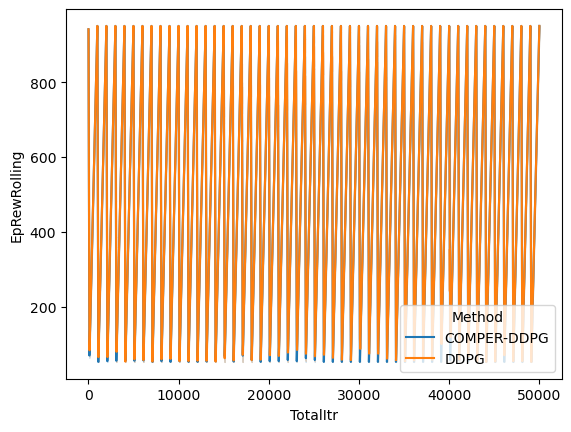

In [19]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')

In [20]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,2.0,COMPER-DDPG,2.0
2,15000,2.0,COMPER-DDPG,2.0
3,20000,2.0,COMPER-DDPG,2.0
4,25000,2.0,COMPER-DDPG,2.0
5,30000,2.0,COMPER-DDPG,2.0


In [21]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,2.0,DDPG,2.0
2,15000,3.0,DDPG,2.5
3,20000,2.0,DDPG,2.5
4,25000,3.0,DDPG,2.5
5,30000,2.0,DDPG,2.5


<Axes: xlabel='Int', ylabel='EpRewRolling'>

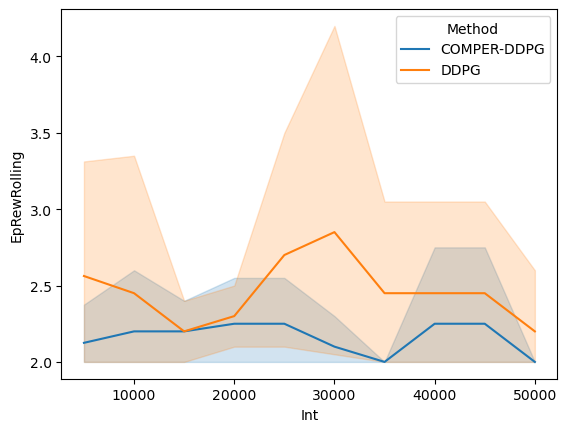

In [22]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')

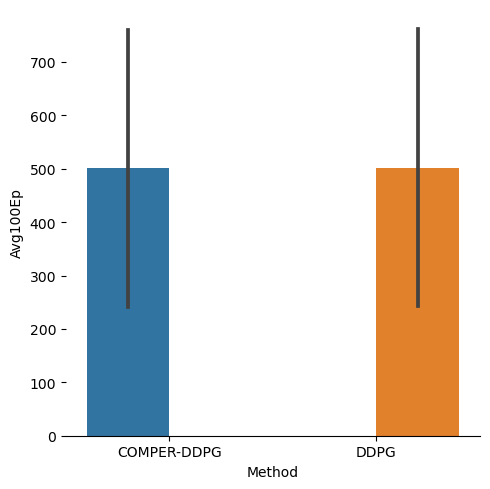

In [23]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)

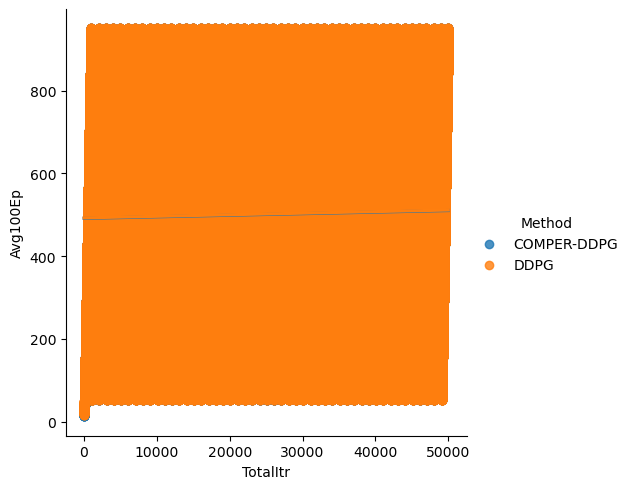

In [24]:
g = sns.lmplot(
    data=df,
    x="TotalItr", y="Avg100Ep", hue="Method",
    height=5
)